In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## What is Normalization?

#### Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

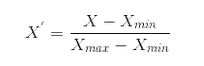

In [3]:
data=np.array([1.0,12.4,3.9,10.4])
data

array([ 1. , 12.4,  3.9, 10.4])

### For [0,1]

In [4]:
#X-Xmin / Xmax-Xmin
norm=(data-np.min(data))/(np.max(data)-np.min(data))
norm

array([0.        , 1.        , 0.25438596, 0.8245614 ])

### For [a,b]

In [5]:
a=5
b=10
norm=a+((data-np.min(data))* (b-a)/(np.max(data)-np.min(data)))
norm

array([ 5.        , 10.        ,  6.27192982,  9.12280702])

### MinMaxScaler for normalization of Data in range  between 0 and 1

In [10]:
mm=MinMaxScaler()
#fit 
#transform
#inverse transform
#fit_transform
mm.fit(data.reshape(-1,1))
norm=mm.transform(data.reshape(-1,1))
norm

array([[0.        ],
       [1.        ],
       [0.25438596],
       [0.8245614 ]])

In [12]:
mm.inverse_transform([[0.25438596]]) #=> 3.9

array([[3.89999994]])

In [13]:
mm.fit_transform(data.reshape(-1,1))

array([[0.        ],
       [1.        ],
       [0.25438596],
       [0.8245614 ]])

### MinMaxScaler for normalization of Data in range  between a and b

In [15]:
a=5
b=10
mm=MinMaxScaler(feature_range=(a,b))
mm.fit(data.reshape(-1,1))
norm=mm.transform(data.reshape(-1,1))
norm

array([[ 5.        ],
       [10.        ],
       [ 6.27192982],
       [ 9.12280702]])

In [16]:
norm=mm.fit_transform(data.reshape(-1,1))
norm

array([[ 5.        ],
       [10.        ],
       [ 6.27192982],
       [ 9.12280702]])

## What is Standardization?

#### Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
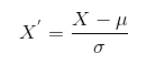

In [17]:
data

array([ 1. , 12.4,  3.9, 10.4])

In [19]:
#scale_data =X -mean / std
scaled_data=(data-np.mean(data))/np.std(data)
scaled_data

array([-1.27554   ,  1.17866354, -0.65122506,  0.74810152])

In [20]:
## mean of scaled Data
np.mean(scaled_data)
#-1.11022 x 10^ -16

-1.1102230246251565e-16

In [21]:
np.std(scaled_data)

0.9999999999999998

### StandardScaler z-scale normalization

In [25]:
sc=StandardScaler()
#fit
#transform
#inverse_transform
#fit_transform
data=data.reshape(-1,1)
sc.fit(data)
sc.transform(data)

array([[-1.27554   ],
       [ 1.17866354],
       [-0.65122506],
       [ 0.74810152]])

In [26]:
sc.inverse_transform([[-0.65122506]])

array([[3.90000001]])

In [27]:
sc.fit_transform(data)

array([[-1.27554   ],
       [ 1.17866354],
       [-0.65122506],
       [ 0.74810152]])

In [28]:
 df=pd.read_csv("../Data/bodyfat.csv")

In [29]:
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<AxesSubplot:>

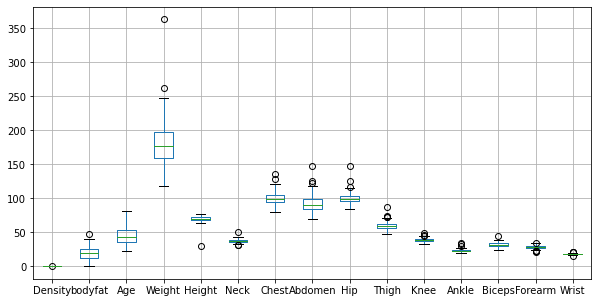

In [31]:
df.boxplot(figsize=(10,5))

<AxesSubplot:>

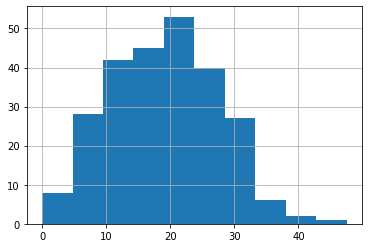

In [40]:
df["bodyfat"].hist()

In [39]:
#min max scaler 
mm=MinMaxScaler()
mdf=mm.fit_transform(df)
mdf=pd.DataFrame(mdf,columns=df.columns)
mdf

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.665496,0.258947,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.792801,0.128421,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.407375,0.532632,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.703248,0.218947,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.342406,0.604211,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.690079,0.231579,0.813559,0.064378,0.777202,0.189055,0.173989,0.180432,0.060606,0.059850,0.111801,0.162162,0.039604,0.338129,0.482143
248,0.251097,0.707368,0.847458,0.337216,0.834197,0.487562,0.513181,0.452351,0.311005,0.309227,0.484472,0.277027,0.514851,0.546763,0.767857
249,0.331870,0.616842,0.847458,0.278970,0.756477,0.388060,0.558875,0.534943,0.266348,0.326683,0.267081,0.162162,0.321782,0.446043,0.392857
250,0.394205,0.547368,0.847458,0.295320,0.849741,0.388060,0.509666,0.405337,0.204147,0.219451,0.534161,0.243243,0.282178,0.604317,0.714286


<AxesSubplot:>

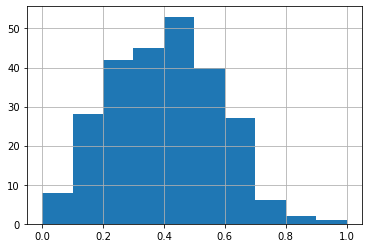

In [41]:
mdf["bodyfat"].hist()

<AxesSubplot:>

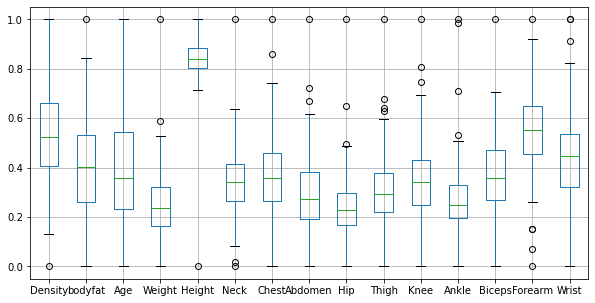

In [42]:
mdf.boxplot(figsize=(10,5))

## Standard Scaler

In [46]:
sc=StandardScaler()
scaled_data=sc.fit_transform(df)
scaled_data=pd.DataFrame(scaled_data,columns=df.columns)
scaled_data.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.801647,-0.820246,-1.740073,-0.841246,-0.656205,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541
1,1.565061,-1.562573,-1.819583,-0.193462,0.574790,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943
2,-0.746240,0.736245,-1.819583,-0.849769,-1.066536,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177
3,1.028039,-1.047733,-1.501543,0.198617,0.574790,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943
4,-1.135844,1.143327,-1.660563,0.181570,0.301235,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578


In [47]:
scaled_data.mean()

Density    5.719411e-15
bodyfat   -1.603655e-16
Age        1.920862e-16
Weight     2.757935e-16
Height     1.475396e-15
Neck      -7.586524e-16
Chest     -3.524518e-17
Abdomen    3.665498e-16
Hip        8.132824e-16
Thigh     -8.426626e-16
Knee       8.564578e-16
Ankle      7.361836e-16
Biceps    -8.304644e-17
Forearm   -2.977336e-15
Wrist      2.854859e-16
dtype: float64

In [48]:
scaled_data.std()

Density    1.00199
bodyfat    1.00199
Age        1.00199
Weight     1.00199
Height     1.00199
Neck       1.00199
Chest      1.00199
Abdomen    1.00199
Hip        1.00199
Thigh      1.00199
Knee       1.00199
Ankle      1.00199
Biceps     1.00199
Forearm    1.00199
Wrist      1.00199
dtype: float64